[log] build CNNParamNet net succ
init DALIDataManipulator
building idx2dst map...
building idx2dst map...
create dataloader succ
[debug] build resnet succ, total param 4462447
[warning] given load path ../output/07-06-14_25_08-0.1071.pkl is invalid, ignore
torch.Size([128, 4, 360, 480])


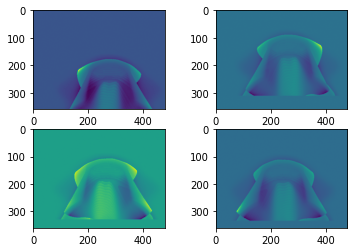

In [1]:
import numpy as np
import torch
import json
from agents.agent_builder import build_net


def init_env():
    np.set_printoptions(suppress=True)
    # from tqdm import tqdm
    # lst = list(np.random.rand(100))
    # for id, _ in enumerate(tqdm(lst)):
    #     print(id)

    # exit()
    np.random.seed(0)
    torch.manual_seed(0)
    is_cuda_avaliable = torch.cuda.is_available()
    assert is_cuda_avaliable == True

    if is_cuda_avaliable == True:
        device = torch.device("cuda", 0)
    else:
        device = torch.device("cpu", 0)
    return device

import matplotlib.pyplot as plt
def show_images(image_batch):
    print(image_batch.shape)
    show_size = 4
    # exit()
    rows = max(int(np.sqrt(show_size)), 1)
    cols = max(int(show_size / rows), 1)

    for i in range(show_size):
        ax = plt.subplot(rows, cols, i + 1)
        ax.imshow(np.array(torch.squeeze(image_batch[0][i]).cpu()))
    plt.show()
if __name__ == "__main__":

    # net = ParamNet(conf_path, device)
    device = init_env()

    conf_path = "../config/train_configs/conv_conf.json"
    # conf_path = "../config/train_configs/fc_conf.json"

    with open(conf_path) as f:
        mode = json.load(f)["mode"]
    net_type = build_net(conf_path)
    net = net_type(conf_path, device)

    loader = net.train_dataloader
    batched = next(loader)
    input, output = batched
    show_images(input)
    